In [19]:
!pip install tensorflow


In [20]:
import numpy as np
import pandas as pd

df = pd.read_csv('winequality-red.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
import tensorflow as tf

train_df = df.sample(frac=0.75, random_state=4)
val_df = df.drop(train_df.index)

In [22]:
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)

range = max_val - min_val
train_df = (train_df - min_val)/(range)

val_df = (val_df- min_val)/range

In [23]:

X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']

input_shape = [X_train.shape[1]]

input_shape

[11]

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1, input_shape = (input_shape[0], ))
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu',
                        input_shape=(input_shape[0],)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam',

			loss='mae')

In [26]:
losses = model.fit(X_train, y_train,

                   validation_data=(X_val, y_val),

                   batch_size=256,
                   epochs=15,
)


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.3377 - val_loss: 0.1935
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1688 - val_loss: 0.1326
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1508 - val_loss: 0.1497
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1515 - val_loss: 0.1229
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1253 - val_loss: 0.1162
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1220 - val_loss: 0.1160
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1210 - val_loss: 0.1079
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1126 - val_loss: 0.1071
Epoch 9/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1126 - val_loss: 0.1042
Epoch 10/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1073 - val_loss: 0.1043
Epoch 11/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1075 - val_loss: 0.1029
Epoch 12/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1088 - val_loss: 0.1023
E

In [14]:
model.predict(X_val.iloc[0:3, :])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[0.40144962],
       [0.550843  ],
       [0.40117398]], dtype=float32)

In [16]:

y_val.iloc[0:3]


,quality
0,0.4
9,0.4
12,0.4


In [17]:
loss_df = pd.DataFrame(losses.history)

<Axes: >

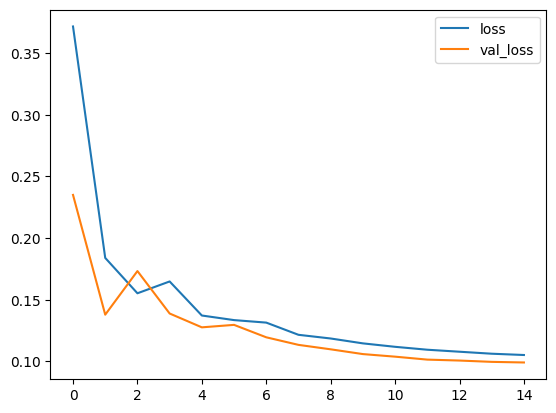

In [18]:
loss_df.loc[:,['loss','val_loss']].plot()